In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, os, sys
os.chdir('E:\Machine Learning Course\Course3\data')
#from colorsetup import colors, palette
from datasetup import labels, colors, palette
sns.set_palette(palette)

In [11]:
path = 'churndata_processed.csv'
df = pd.read_csv(path)

In [12]:
df.dtypes

months                       float64
multiple                       int64
gb_mon                       float64
security                       int64
backup                         int64
protection                     int64
support                        int64
unlimited                      int64
contract                     float64
paperless                      int64
monthly                      float64
satisfaction                 float64
churn_value                    int64
payment_Credit Card            int64
payment_Mailed Check           int64
internet_type_DSL              int64
internet_type_Fiber Optic      int64
internet_type_None             int64
offer_Offer A                  int64
offer_Offer B                  int64
offer_Offer C                  int64
offer_Offer D                  int64
offer_Offer E                  int64
dtype: object

In [13]:
round(df.rename(columns=labels).describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Tenure in Months,7043.0,0.43,0.40,0.0,0.00,0.25,0.75,1.0
Multiple Lines,7043.0,0.42,0.49,0.0,0.00,0.00,1.00,1.0
Avg Monthly GB Download,7043.0,0.24,0.24,0.0,0.04,0.20,0.32,1.0
Online Security,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
Online Backup,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
Device Protection Plan,7043.0,0.34,0.48,0.0,0.00,0.00,1.00,1.0
Premium Tech Support,7043.0,0.29,0.45,0.0,0.00,0.00,1.00,1.0
Unlimited Data,7043.0,0.67,0.47,0.0,0.00,1.00,1.00,1.0
Contract,7043.0,0.38,0.42,0.0,0.00,0.00,1.00,1.0
Paperless Billing,7043.0,0.59,0.49,0.0,0.00,1.00,1.00,1.0


<AxesSubplot:>

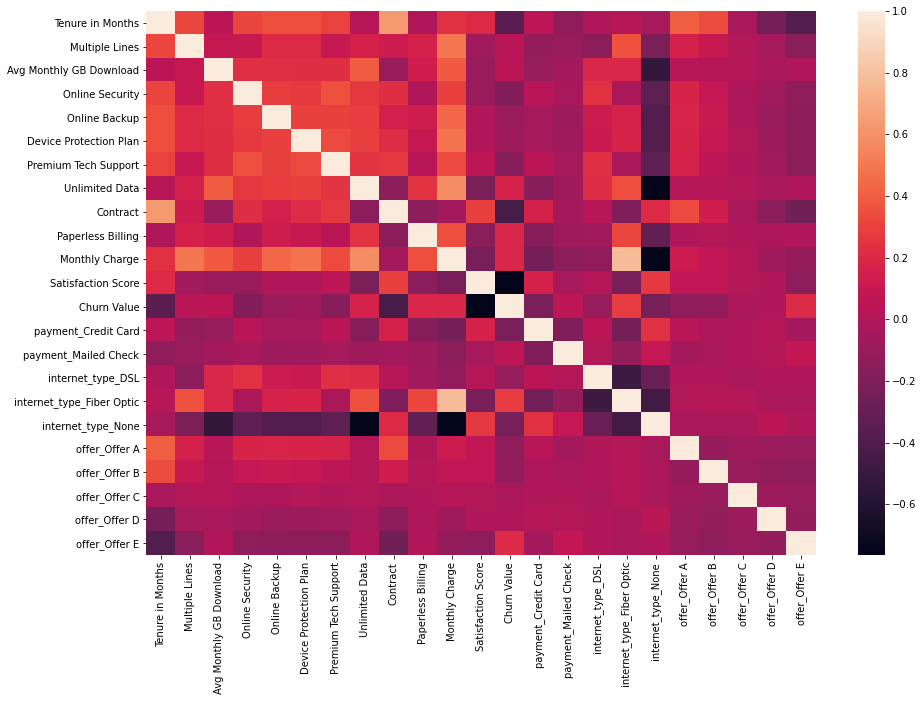

In [17]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.rename(columns=labels).corr())

In [18]:
target = 'churn_value'
df[target].value_counts()

0    5174
1    1869
Name: churn_value, dtype: int64

In [19]:
df[target].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: churn_value, dtype: float64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in df.columns if x!= target]

stra_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=1500,random_state=42)

train_idx,test_idx = next(stra_shuf_split.split(df[feature_cols],df[target]))

X_train = df.loc[train_idx,feature_cols]
y_train = df.loc[train_idx,target]

X_test = df.loc[test_idx,feature_cols]
y_test = df.loc[test_idx,target]

In [22]:
y_train.value_counts(normalize=True)

0    0.73462
1    0.26538
Name: churn_value, dtype: float64

In [23]:
y_test.value_counts(normalize=True)

0    0.734667
1    0.265333
Name: churn_value, dtype: float64

In [26]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True,random_state=42,warm_start=True,n_jobs=-1)

oob_list = []

for n_trees in [15,20,30,40,50,100,150,200,300,400]:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train,y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees':n_trees,'oob':oob_error}))
    
rf_oob_df = pd.concat(oob_list,axis=1).T.set_index('n_trees')
rf_oob_df

,oob
n_trees,
15.0,0.055566
20.0,0.052138
30.0,0.049973
40.0,0.048890
50.0,0.049071
100.0,0.047447
150.0,0.046726
200.0,0.047447
300.0,0.047988


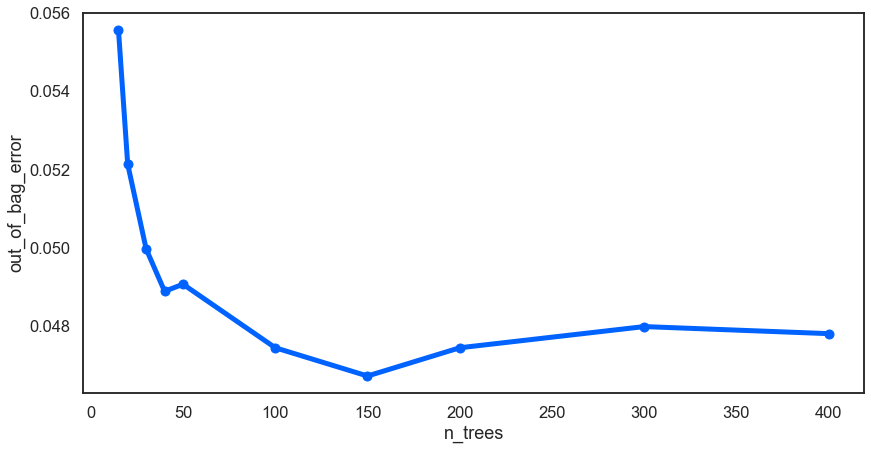

In [29]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False,marker='o',figsize=(14,7),linewidth=5)
ax.set(ylabel='out_of_bag_error');

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

EF = ExtraTreesClassifier(oob_score=True,random_state=42,warm_start=True,bootstrap=True,n_jobs=-1)

oob_list = []

for n_trees in [15,20,30,40,50,100,150,200,300,400]:
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train,y_train)
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees':n_trees,'oob':oob_error}))
    
ef_oob_df = pd.concat(oob_list,axis=1).T.set_index('n_trees')
ef_oob_df

,oob
n_trees,
15.0,0.066570
20.0,0.063864
30.0,0.057550
40.0,0.053942
50.0,0.052318
100.0,0.051236
150.0,0.048890
200.0,0.048530
300.0,0.049612


In [31]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),ef_oob_df.rename(columns={'oob':'ExtraTree'})],axis=1)

In [32]:
oob_df

,RandomForest,ExtraTree
n_trees,,
15.0,0.055566,0.066570
20.0,0.052138,0.063864
30.0,0.049973,0.057550
40.0,0.048890,0.053942
50.0,0.049071,0.052318
100.0,0.047447,0.051236
150.0,0.046726,0.048890
200.0,0.047447,0.048530
300.0,0.047988,0.049612


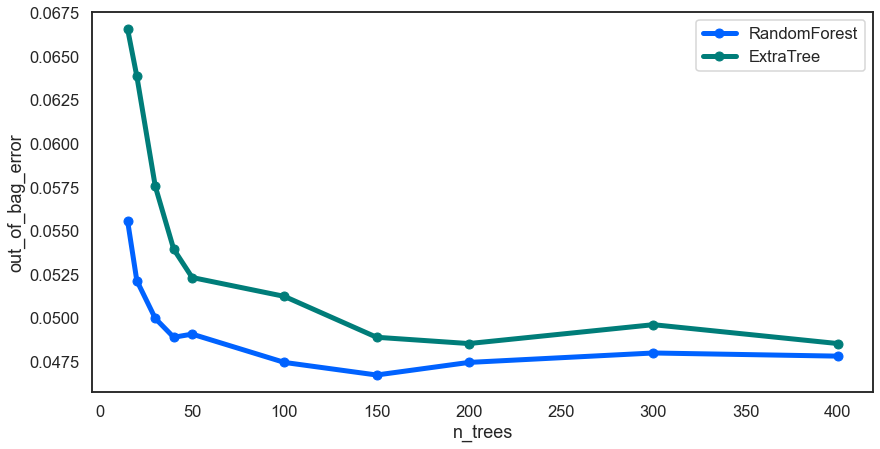

In [34]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o',figsize=(14,7),linewidth=5)
ax.set(ylabel='out_of_bag_error');

In [35]:
model = RF.set_params(n_estimators=150)

y_pred = model.predict(X_test)

y_prob = model.predict_proba(X_test)

In [36]:
y_prob

array([[0.035 , 0.965 ],
       [1.    , 0.    ],
       [0.655 , 0.345 ],
       ...,
       [0.0525, 0.9475],
       [0.97  , 0.03  ],
       [0.9825, 0.0175]])

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score
from sklearn.metrics import recall_score,precision_score

cr = classification_report(y_test,y_pred)
print(cr)

scores_df = pd.DataFrame({'accuracy':accuracy_score(y_test,y_pred),
                       'precision':precision_score(y_test,y_pred),
                       'recall':recall_score(y_test,y_pred),
                       'f1_score':f1_score(y_test,y_pred),
                       'auc':roc_auc_score(y_test,y_prob[:,1])},
                       index=pd.Index([0]))

display(scores_df)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1102
           1       0.94      0.83      0.88       398

    accuracy                           0.94      1500
   macro avg       0.94      0.90      0.92      1500
weighted avg       0.94      0.94      0.94      1500



,accuracy,precision,recall,f1_score,auc
0,0.94,0.9375,0.829146,0.88,0.970176


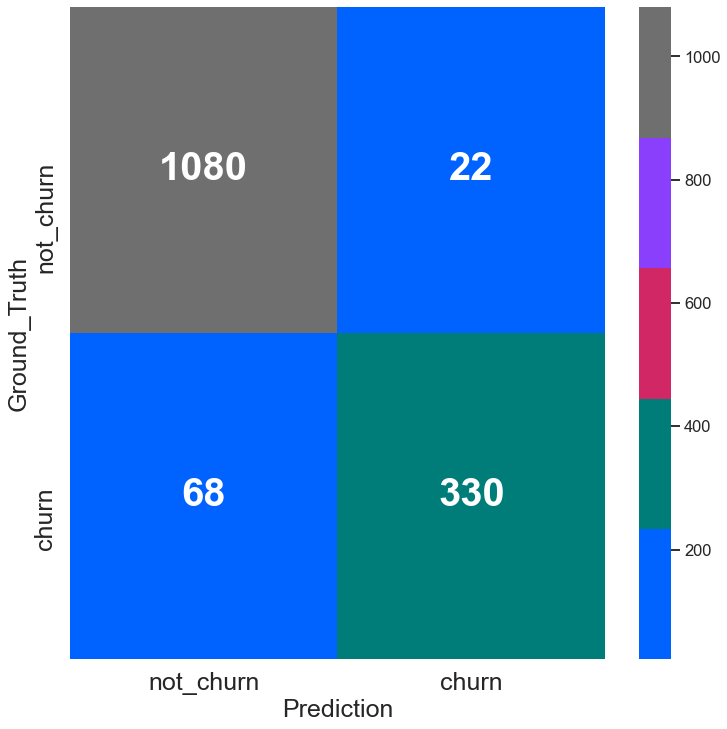

In [41]:
sns.set_context('talk')
sns.set_style('white')

cm = confusion_matrix(y_test,y_pred)

_,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm,annot=True,fmt='d',cmap=colors,annot_kws={"size":40,"weight":"bold"})

labels = ['not_churn','churn']
ax.set_xticklabels(labels,fontsize=25);
ax.set_yticklabels(labels,fontsize=25);
ax.set_ylabel('Ground_Truth',fontsize=25);
ax.set_xlabel('Prediction',fontsize=25);


In [44]:
from sklearn.metrics import precision_recall_curve,roc_curve

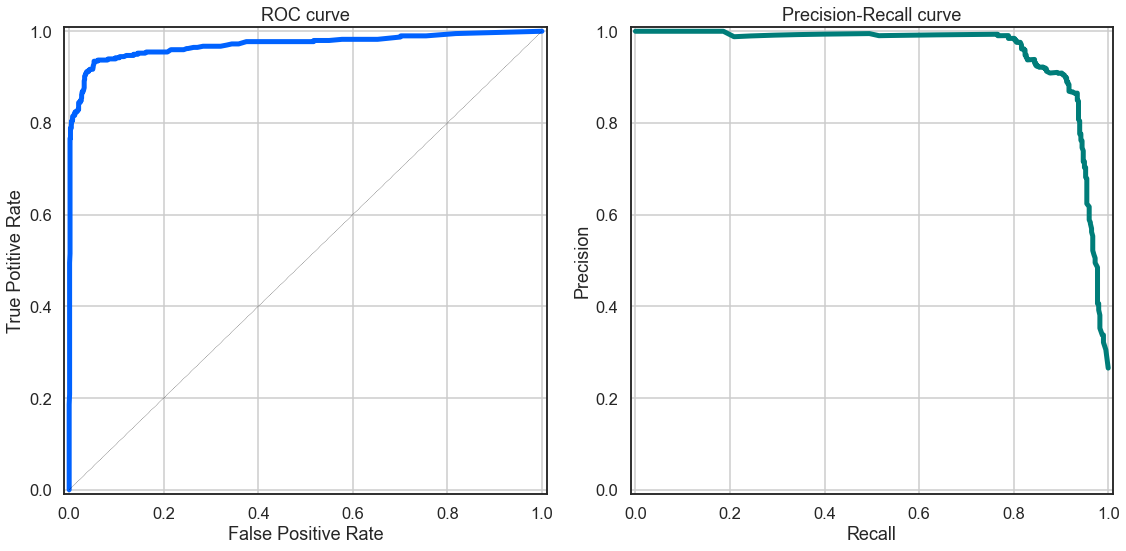

In [47]:
sns.set_context('talk')

fig,axList = plt.subplots(ncols=2)
fig.set_size_inches(16,8)

ax = axList[0]

fpr,tpr,threshold = roc_curve(y_test,y_prob[:,1])
ax.plot(fpr,tpr,color=colors[0],linewidth=5)
ax.plot([0,1],[0,1],ls='--',color='black',lw=0.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Potitive Rate',
       xlim=[-0.01,1.01],ylim=[-0.01,1.01],
       title='ROC curve')
ax.grid(True)

ax = axList[1]

precision,recall,_ = precision_recall_curve(y_test,y_prob[:,1])
ax.plot(recall,precision,color=colors[1],linewidth=5)
ax.set(xlabel='Recall',
       ylabel='Precision',
       xlim=[-0.01,1.01],ylim=[-0.01,1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

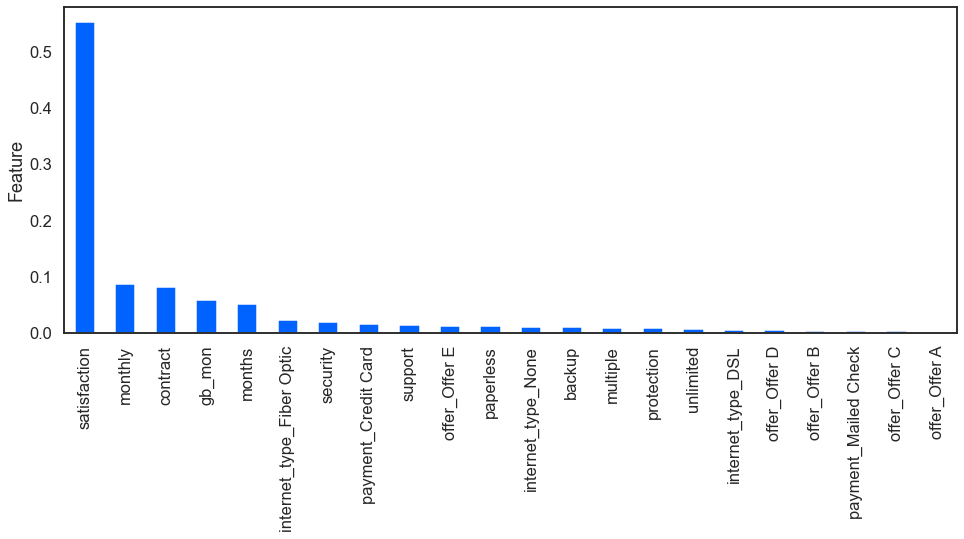

In [50]:
feature_imp = pd.Series(model.feature_importances_,index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar',figsize=(16,6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');